# Training on 10k inputs from dataset and producing 10k samples. 

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Reshape, LSTM
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of table-evaluator to determine which version is compatible with other requirements. This could take a while.
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [4]:
!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.3 MB/s eta 0:00:00
  Using cached psutil-5.9.4-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (280 kB)
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: packaging
    Found existing installation: packaging 23.0
    Uninstalling packaging-23.0:
      Successfully uninstalled packaging-23.0


In [5]:
from ctgan import CTGAN

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/CE903/processed_diabetic_data.csv')

In [7]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,0,0,0,75,6,25,1,1,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,0,0,10,75,1,1,7,3,...,0,1,0,0,0,0,0,1,1,1
2,64410,86047875,1,0,20,75,1,1,7,2,...,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,0,1,30,75,1,1,7,2,...,0,1,0,0,0,0,0,1,1,0
4,16680,42519267,0,1,40,75,1,1,7,1,...,0,2,0,0,0,0,0,1,1,0


In [8]:
df = dataset.iloc[1:10000,2:]

In [9]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [10]:
ctgan = CTGAN(epochs=100, verbose=True)
ctgan.fit(df, column_headers)

Epoch 1, Loss G:  2.8975,Loss D: -3.1592
Epoch 2, Loss G:  0.9792,Loss D: -1.5104
Epoch 3, Loss G:  0.5801,Loss D: -0.5999
Epoch 4, Loss G:  0.5477,Loss D: -0.4081
Epoch 5, Loss G:  0.2651,Loss D:  0.0272
Epoch 6, Loss G: -0.0968,Loss D: -0.0554
Epoch 7, Loss G: -0.2820,Loss D:  0.0312
Epoch 8, Loss G: -0.2012,Loss D:  0.0024
Epoch 9, Loss G:  0.0864,Loss D:  0.1270
Epoch 10, Loss G: -0.3972,Loss D: -0.0662
Epoch 11, Loss G:  0.3691,Loss D: -0.0106
Epoch 12, Loss G:  0.0615,Loss D: -0.0330
Epoch 13, Loss G:  0.4711,Loss D: -0.0888
Epoch 14, Loss G:  0.4081,Loss D: -0.0531
Epoch 15, Loss G:  0.1917,Loss D: -0.2794
Epoch 16, Loss G: -0.2545,Loss D: -0.3786
Epoch 17, Loss G: -0.3270,Loss D:  0.2334
Epoch 18, Loss G:  0.0951,Loss D:  0.5887
Epoch 19, Loss G:  0.0751,Loss D:  0.0357
Epoch 20, Loss G:  0.2726,Loss D: -0.0981
Epoch 21, Loss G:  0.2201,Loss D: -0.2498
Epoch 22, Loss G:  0.1033,Loss D:  0.1524
Epoch 23, Loss G: -0.1900,Loss D: -0.0198
Epoch 24, Loss G: -0.2510,Loss D:  0.0583
E

In [19]:
synthetic_data = ctgan.sample(10000)

In [20]:
df['age']

1       10
2       20
3       30
4       40
5       50
        ..
9995    80
9996    80
9997    50
9998    50
9999    80
Name: age, Length: 9999, dtype: int64

In [21]:
synthetic_data['age']

0       70
1       80
2       30
3       90
4       70
        ..
9995    70
9996    80
9997    40
9998    50
9999    50
Name: age, Length: 10000, dtype: int64

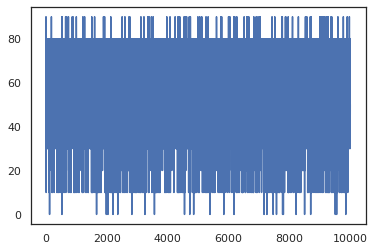

In [22]:
plt.plot(synthetic_data['age'])

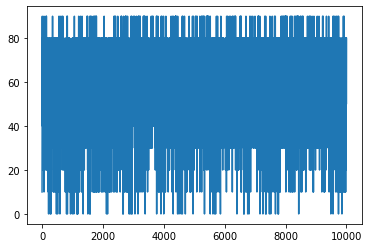

In [15]:
plt.plot(df['age'])

(9999, 48) (10000, 48)


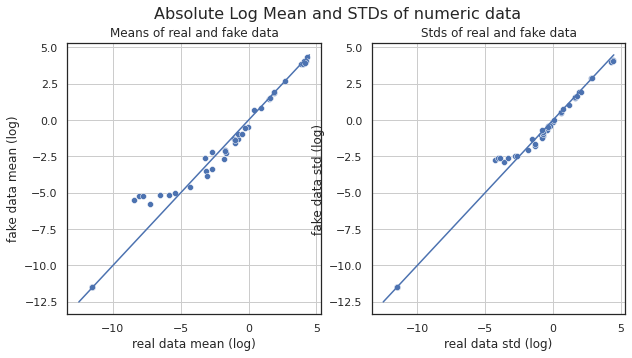

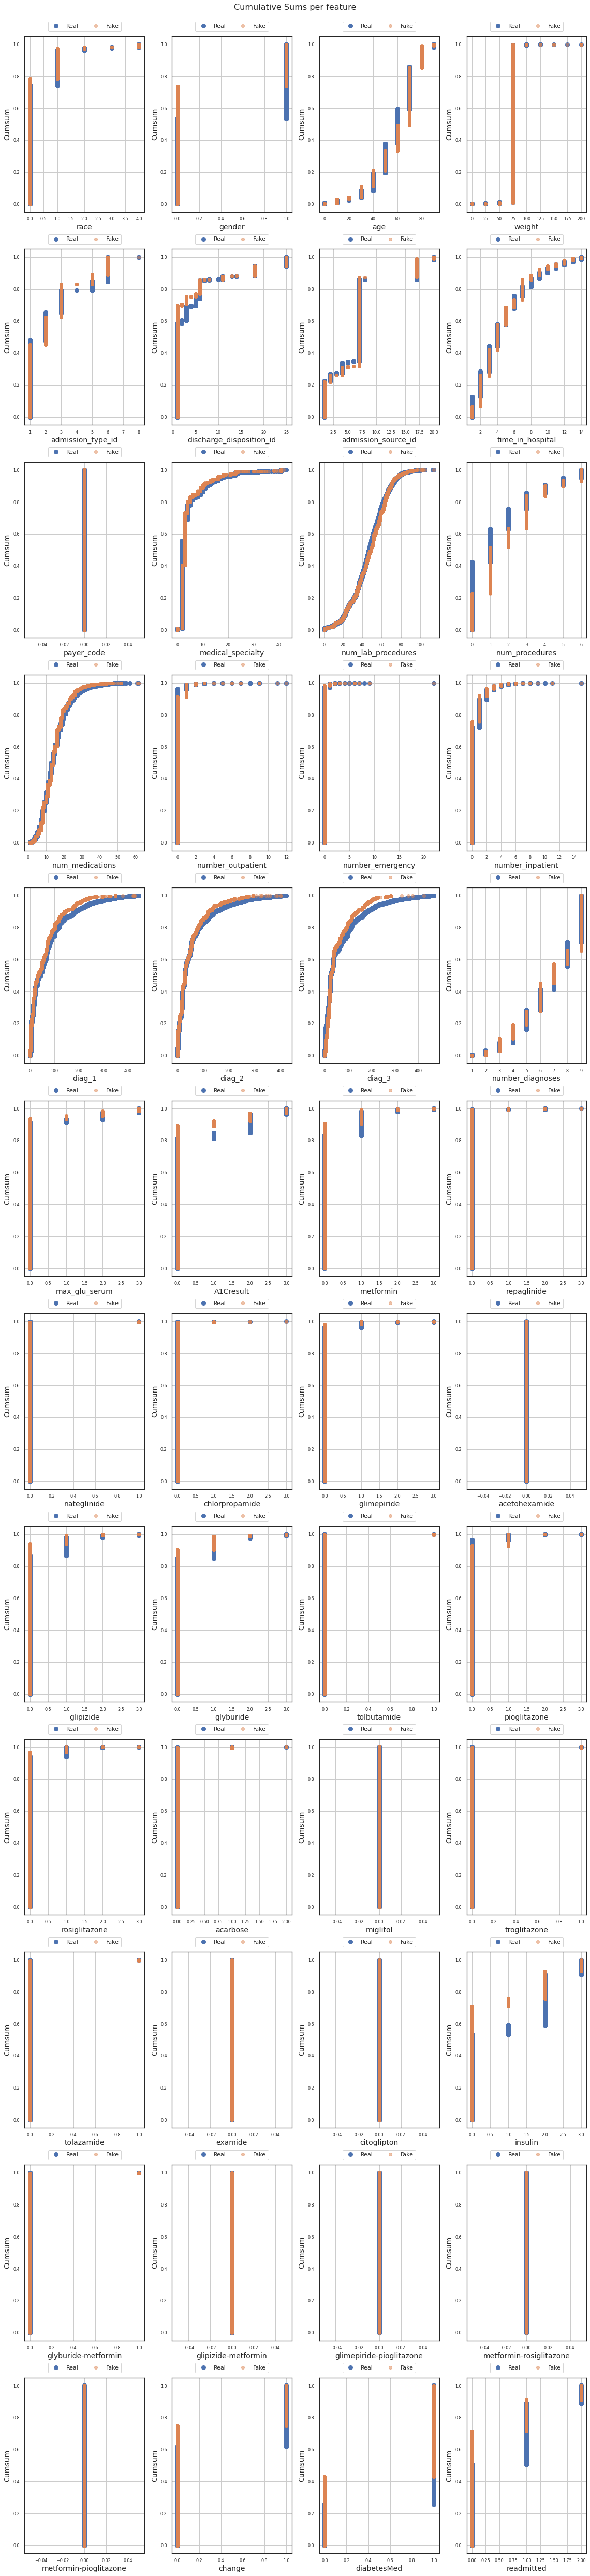

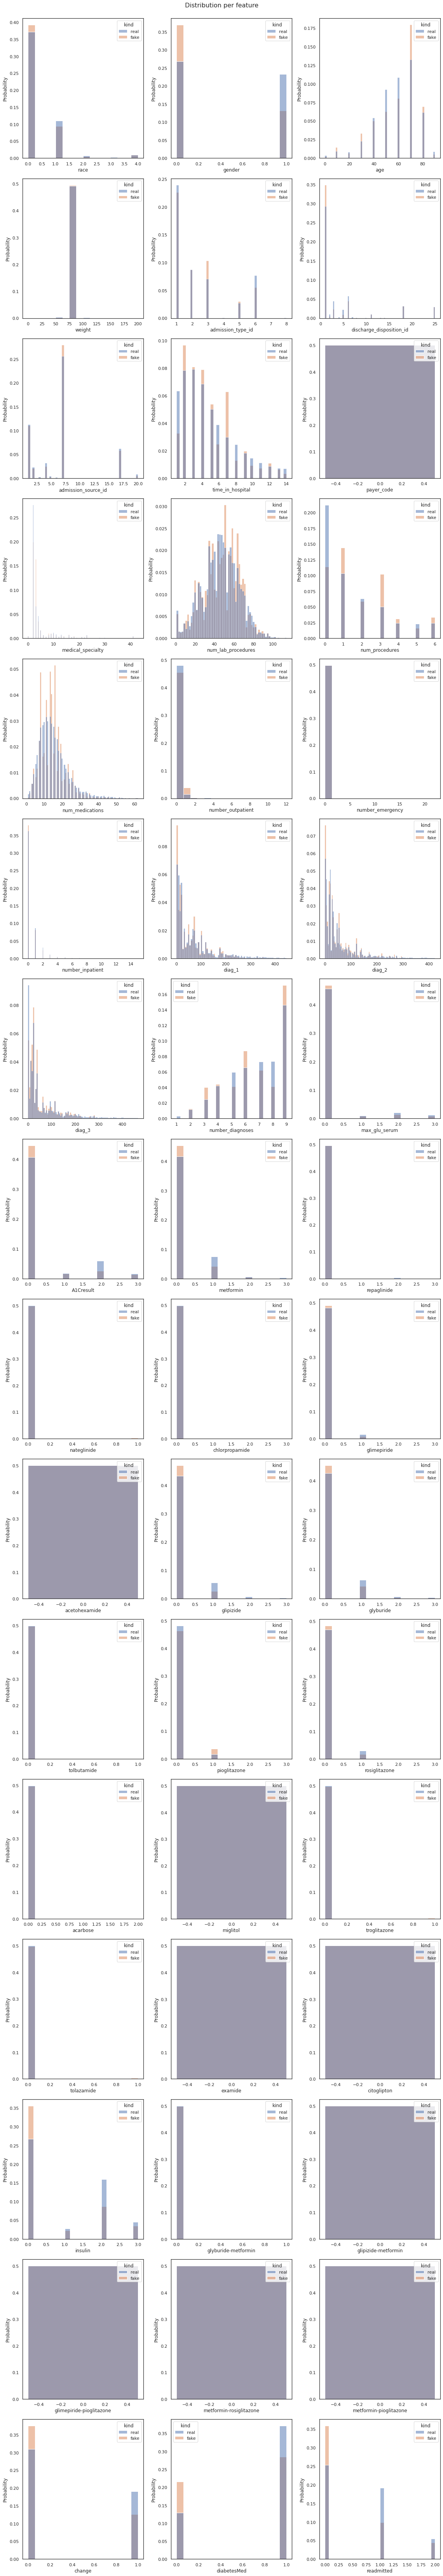

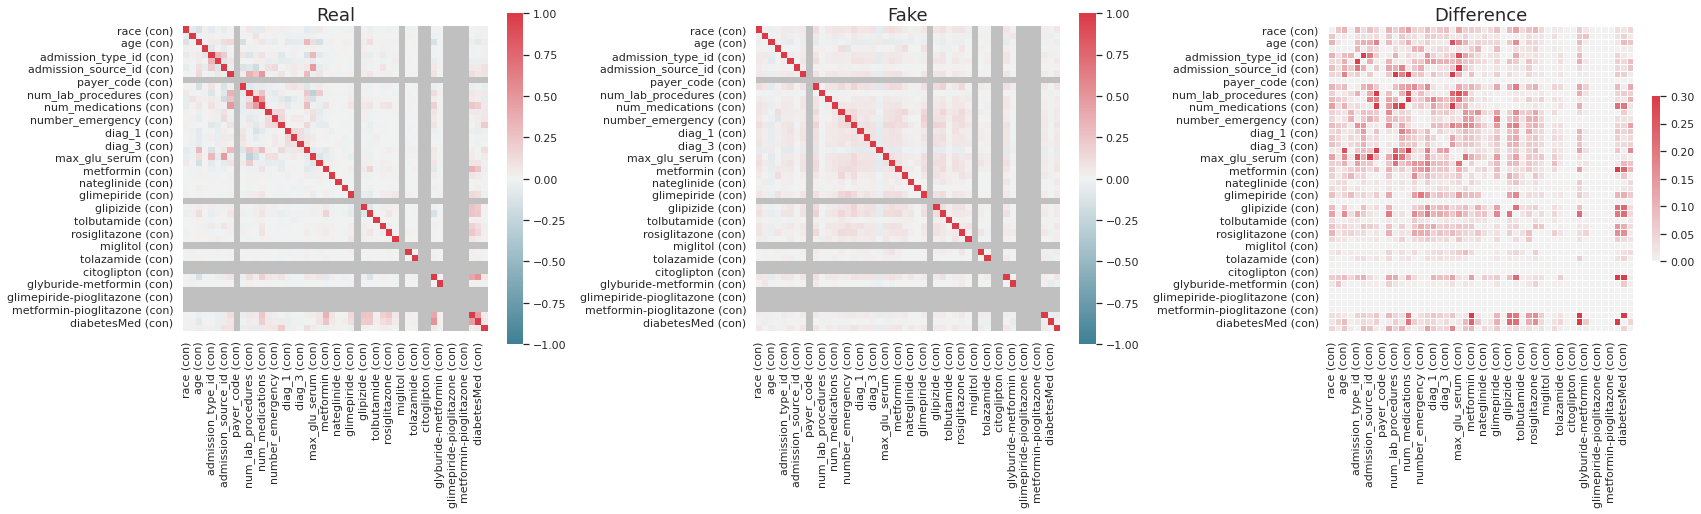

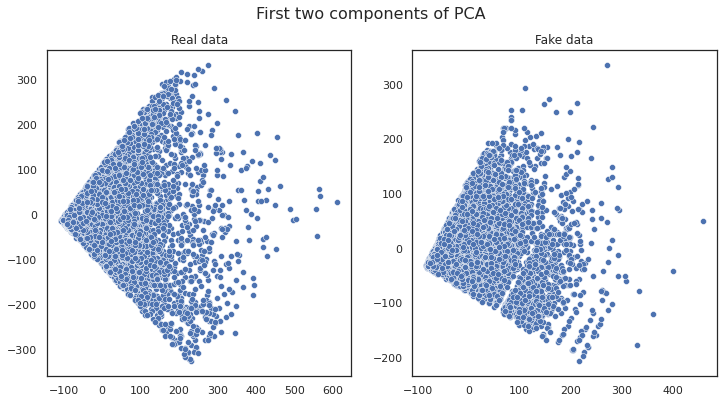

In [23]:
from table_evaluator import TableEvaluator

print(df.shape, synthetic_data.shape)

table_evaluator = TableEvaluator(df, synthetic_data)

table_evaluator.visual_evaluation()

In [24]:
table_evaluator.evaluate(target_col='age')

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.1875   0.2055              0.1047
DecisionTreeClassifier_real   0.2375   0.1500              0.0893
LogisticRegression_fake       0.2920   0.3565              0.4663
LogisticRegression_real       0.3115   0.2495              0.3836
MLPClassifier_fake            0.2385   0.2955              0.2140
MLPClassifier_real            0.2750   0.2125              0.1672
RandomForestClassifier_fake   0.2005   0.2615              0.1370
RandomForestClassifier_real   0.2720   0.2090              0.1271

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    3.3447
nearest neighbor std                     1.2610

Miscellaneous results:
                                  Result
Column Cor

In [25]:
export_samples = synthetic_data.to_csv('synthetic_samples.csv', index=False)
export_samples